In [1]:
# %load /home/jonathan/.ipython/profile_default/startup/01-setup.py
# start up settings for jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

# use plt.style.available() to check out available styles
plt.style.use('seaborn-white')
plt.rcParams['font.size'] = 15.0
plt.rcParams['axes.labelsize'] = 15.0
plt.rcParams['xtick.labelsize'] = 15.0
plt.rcParams['ytick.labelsize'] = 15.0
plt.rcParams['legend.fontsize'] = 15.0

%matplotlib inline

# set the max column width
pd.options.display.max_colwidth = 1000

# to avoid have warnings from chained assignments
pd.options.mode.chained_assignment = None


In [2]:
idx = pd.IndexSlice

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [3]:
fp = '../../prediction-data/final-data.csv'
uniq_fp = '../../prediction-data/uniq-final-data.csv'

base_df = pd.read_csv(fp, header=[0, 1])
base_df.rename(columns={
    'Unnamed: 0_level_1': '',
    'Unnamed: 1_level_1': '',
    'Unnamed: 2_level_1': '',
    'Unnamed: 3_level_1': ''
}, level=1, inplace=True)

uniq_base_df = pd.read_csv(uniq_fp, header=[0, 1])
uniq_base_df.rename(columns={
    'Unnamed: 0_level_1': '',
    'Unnamed: 1_level_1': '',
    'Unnamed: 2_level_1': '',
    'Unnamed: 3_level_1': ''
}, level=1, inplace=True)

def convert_time_cols(df):
    # convert time columns from us to s
    time_cols = list(filter(lambda c: 'time' in c.lower(), df.columns.get_level_values(level=1)))
#     ns_to_s = lambda v: v / 1000000
    for time_col in time_cols:
        df.loc[:, (time_col, 'astar')] /= 1000000
        df.loc[:, (time_col, 'inc3')] /= 1000000
        df.loc[:, (time_col, 'recomp-astar')] /= 1000000
        df.loc[:, (time_col, 'recomp-inc3')] /= 1000000
        
    # rename from us to s
    renamed_time_cols = list(map(lambda col: col.replace('(us)', '(s)'), time_cols))
    renamed_cols_dict = dict(zip(time_cols, renamed_time_cols))
    df.rename(columns=renamed_cols_dict, level=0, inplace=True)
    df.rename(columns=renamed_cols_dict, level=1, inplace=True)
    
convert_time_cols(base_df)
convert_time_cols(uniq_base_df)

base_df.set_index(['model', 'log', 'decomposition', 'SP label'], inplace=True)
uniq_base_df.set_index(['model', 'log', 'decomposition', 'SP label'], inplace=True)

# filter by k=2
k = 2
k_diff = base_df.loc[:, ('Total Time including setup (s)', 'max_diff')] >= k
k2_df = base_df.loc[k_diff, :]

print('Base df shape: {}'.format(base_df.shape))
print('Uniq base df shape: {}'.format(uniq_base_df.shape))

/home/jonathan/github-repos/2018/2018-09-26_align-algo-clf/alignclf-venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Base df shape: (245478, 258)
Uniq base df shape: (185848, 258)


In [4]:
base_df_description = base_df.describe()
base_df_description

Cost of the alignment                                             \
                      astar           inc3  recomp-astar   recomp-inc3   
count         245478.000000  245478.000000  245478.00000  245478.00000   
mean              58.810223      58.706507      58.85958      58.85958   
std              138.578890     138.370714     138.80824     138.80824   
min                0.000000       0.000000       0.00000       0.00000   
25%                0.000000       0.000000       0.00000       0.00000   
50%                0.000000       0.000000       0.00000       0.00000   
75%               28.000000      28.000000      28.00000      28.00000   
max             1256.000000    1256.000000    1256.00000    1256.00000   

      Heuristics computed                                               \
                    astar           inc3   recomp-astar    recomp-inc3   
count       245478.000000  245478.000000  245478.000000  245478.000000   
mean           699.178839       6.601239     781.816077      81.152808   
std           2044.251231      31.928147    2101.041259      45.155732   
min              1.000000       1.000000      12.000000      12.000000   
25%              1.000000       1.000000      71.000000      71.000000   
50%              1.000000       1.000000      74.000000      75.000000   
75%             30.000000       2.000000     137.000000      79.000000   
max          38800.000000     648.000000   25251.000000     989.000000   

      Heuristics derived                     ...        \
                   astar           inc3      ...         
count      245478.000000  245478.000000      ...         
mean          309.075583     268.943172      ...         
std           645.408237     695.399343      ...         
min             3.000000       3.000000      ...         
25%            59.000000      59.000000      ...         
50%            85.000000      84.000000      ...         
75%           186.000000     174.000000      ...         
max         23185.000000   16646.000000      ...         

           model_trace_features                                    \
      n_uniq_tran_three_out_deg n_uniq_tran_more_than_five_in_deg   
count                  245478.0                          245478.0   
mean                        0.0                               0.0   
std                         0.0                               0.0   
min                         0.0                               0.0   
25%                         0.0                               0.0   
50%                         0.0                               0.0   
75%                         0.0                               0.0   
max                         0.0                               0.0   

                                         Total Time including setup (s)  \
      n_uniq_tran_more_than_five_out_deg                astar_over_inc3   
count                           245478.0                  245478.000000   
mean                                 0.0                       2.938427   
std                                  0.0                      10.294545   
min                                  0.0                       0.007661   
25%                                  0.0                       0.223212   
50%                                  0.0                       0.348223   
75%                                  0.0                       0.709810   
max                                  0.0                    1054.984998   

                                                                             \
      astar_over_recomp-astar astar_over_recomp-inc3 inc3_over_recomp-astar   
count           245478.000000          245478.000000          245478.000000   
mean                 2.021559               3.072582               1.137229   
std                 73.461084              45.339844               1.335267   
min                  0.011157               0.020145               0.005110   
25%                  0.1950

In [5]:
uniq_base_df_description = uniq_base_df.describe()
uniq_base_df_description

Cost of the alignment                                               \
                      astar           inc3   recomp-astar    recomp-inc3   
count         185848.000000  185848.000000  185848.000000  185848.000000   
mean              74.339331      74.202337      74.404524      74.404524   
std              152.455938     152.219942     152.724650     152.724650   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       0.000000   
50%                0.000000       0.000000       0.000000       0.000000   
75%               76.000000      76.000000      76.000000      76.000000   
max             1256.000000    1256.000000    1256.000000    1256.000000   

      Heuristics computed                                               \
                    astar           inc3   recomp-astar    recomp-inc3   
count       185848.000000  185848.000000  185848.000000  185848.000000   
mean           886.263662       8.067614     975.300525      85.321424   
std           2265.943311      35.787051    2330.003216      48.034073   
min              1.000000       1.000000      12.000000      12.000000   
25%              1.000000       1.000000      71.000000      72.000000   
50%              1.000000       1.000000      74.000000      76.000000   
75%            473.000000       3.000000     524.000000      83.000000   
max          38800.000000     648.000000   25251.000000     989.000000   

      Heuristics derived                     ...        \
                   astar           inc3      ...         
count      185848.000000  185848.000000      ...         
mean          365.579183     316.126060      ...         
std           715.646261     777.417615      ...         
min             3.000000       3.000000      ...         
25%            60.000000      60.000000      ...         
50%            91.000000      91.000000      ...         
75%           255.000000     216.000000      ...         
max         23185.000000   16646.000000      ...         

           model_trace_features                                    \
      n_uniq_tran_three_out_deg n_uniq_tran_more_than_five_in_deg   
count                  185848.0                          185848.0   
mean                        0.0                               0.0   
std                         0.0                               0.0   
min                         0.0                               0.0   
25%                         0.0                               0.0   
50%                         0.0                               0.0   
75%                         0.0                               0.0   
max                         0.0                               0.0   

                                         Total Time including setup (s)  \
      n_uniq_tran_more_than_five_out_deg                astar_over_inc3   
count                           185848.0                  185848.000000   
mean                                 0.0                       3.659241   
std                                  0.0                      11.550357   
min                                  0.0                       0.016038   
25%                                  0.0                       0.240557   
50%                                  0.0                       0.382222   
75%                                  0.0                       3.438194   
max                                  0.0                    1054.984998   

                                                                             \
      astar_over_recomp-astar astar_over_recomp-inc3 inc3_over_recomp-astar   
count           185848.000000          185848.000000          185848.000000   
mean                 2.384936               3.813021               1.058540   
std                 83.008140              51.479848               1.333621   
min                  0.011305               0.020145               0.005110   
25%    

### Data description

### Number of alignment computations
Each row has 4 alignment computations and there is two more with the recomposing approaches (classic and splitpoint) being executed under another decomposition.

In [6]:
n_comp = base_df.index.droplevel(['decomposition']).unique().shape[0]
n_comp * 4 + n_comp * 2

828498

In [ ]:
base

In [16]:
model_feature_df = base_df.groupby(level=['model', 'log', 'SP label'], axis=0).first().loc[:, idx['model_trace_features', ('n_transition', 'n_place', 'n_arc', 'trace_length')]]
print('Number of traces: {}'.format(model_feature_df.shape[0]))
print(model_feature_df.describe())
model_info_df = base_df.groupby(level=['model', 'log'], axis=0).first().loc[:, idx['model_trace_features', ('n_transition', 'n_place', 'n_arc')]]
model_info_df.describe().to_csv('./model-info.csv', float_format='%.1f')

Number of traces: 138083
      model_trace_features                                             
              trace_length   n_transition        n_place          n_arc
count        138083.000000  138083.000000  138083.000000  138083.000000
mean             72.488525     239.291643     176.347508     512.186352
std              37.552596      32.051356      18.956778      60.354026
min               1.000000     127.000000     120.000000     306.000000
25%              49.000000     239.000000     163.000000     502.000000
50%              62.000000     243.000000     178.000000     510.000000
75%              86.000000     258.000000     187.000000     546.000000
max             419.000000     264.000000     245.000000     580.000000


In [18]:
base_df.index.get_level_values(level='model').unique().shape

(20,)

### Visualize data classes

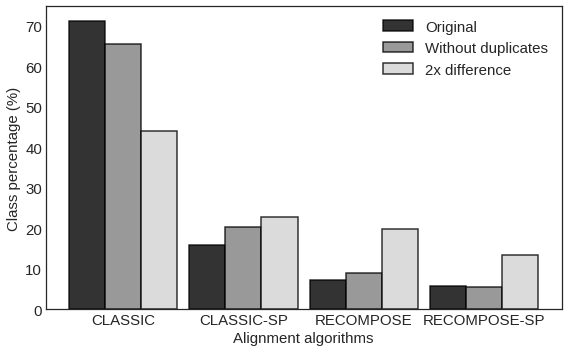

In [20]:
class_counts = base_df.loc[:,('Min', 'Total Time including setup (s)')].value_counts().values
percentile_classes = class_counts / class_counts.sum() * 100.

class_counts_uniq = uniq_base_df.loc[:,('Min', 'Total Time including setup (s)')].value_counts().values
percentile_classes_uniq = class_counts_uniq / class_counts_uniq.sum() * 100.

class_counts_k2 = k2_df.loc[:,('Min', 'Total Time including setup (s)')].value_counts().values
percentile_classes_k2 = class_counts_k2 / class_counts_k2.sum() * 100.

def visualize_classes(percentile_classes, percentile_classes_uniq, percentile_classes_k):
    fig, ax = plt.subplots(figsize=(8, 5))

    algo_types = [
        'CLASSIC', 'CLASSIC-SP', 'RECOMPOSE', 'RECOMPOSE-SP'
    ]
    data_type = ['Original', 'Without duplicates', '2x difference']

    hatches = ['/', 'x', '\\', '.']
    colors = ['black', 'gray', 'lightgray', 'purple']
    width = 0.3
    alpha = 0.8
    xticks = algo_types
    yticks = [i * 0.1 for i in range(11)]
    ind = np.arange(4)
    edgecolor = 'black'
    linewidth = 1.5
    fontsize=15

    rects1 = ax.bar(ind, percentile_classes, width, color=colors[0], alpha=alpha, 
                    edgecolor=edgecolor, linewidth=linewidth)
    rects2 = ax.bar(ind + width, percentile_classes_uniq, width, color=colors[1], 
                   alpha=alpha, edgecolor=edgecolor, linewidth=linewidth)
    rects3 = ax.bar(ind + 2 * width, percentile_classes_k, width, color=colors[2],
                   alpha=alpha, edgecolor=edgecolor, linewidth=linewidth)

    ax.set_xticks(ind + width)
    ax.set_xticklabels(xticks)
    ax.set_ylabel('Class percentage (%)', fontsize=fontsize)
    ax.set_xlabel('Alignment algorithms', fontsize=fontsize)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
        tick.label.set_horizontalalignment('center')
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)

    ax.legend((rects1[0], rects2[0], rects3[0]), data_type, fontsize=fontsize);
    
    return fig, ax

fig, ax = visualize_classes(percentile_classes, percentile_classes_uniq, percentile_classes_k2)
out_fp = './class-dist.svg'
fig.tight_layout()
fig.savefig(out_fp, bbox_inches='tight', rasterized=True)

### Check for statistically and scientifically significant differences

In [9]:
min_total_astar = base_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'astar'
min_total_inc3 = base_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'inc3'
min_total_r_astar = base_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'recomp-astar'
min_total_r_inc3 = base_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'recomp-inc3'

select_col_0 = ('model_trace_features', 'Total Time including setup (s)', 'Cost of alignment')
select_col_1 = ('trace_length', 'astar', 'inc3', 'recomp-astar', 'recomp-inc3')

stats_astar = base_df.loc[min_total_astar, idx[select_col_0, select_col_1]].describe()
stats_inc3 = base_df.loc[min_total_inc3, idx[select_col_0, select_col_1]].describe()
stats_r_astar = base_df.loc[min_total_r_astar, idx[select_col_0, select_col_1]].describe()
stats_r_inc3 = base_df.loc[min_total_r_inc3, idx[select_col_0, select_col_1]].describe()

select_col_0 = ('Total Time including setup (s)', 'Cost of alignment')
select_col_1 = ('astar', 'inc3', 'recomp-astar', 'recomp-inc3')

algo_type = ['astar', 'inc3', 'recomp-astar', 'recomp-inc3']
conditions = [min_total_astar, min_total_inc3, min_total_r_astar, min_total_r_inc3]

# diff_df_list = list()

# for algo, condition in zip(algo_type, conditions):
#     diff = base_df.loc[condition, idx[select_col_0, select_col_1]]
#     total_time = diff.loc[:, ('Total Time including setup (s)', algo)].values.reshape((diff.shape[0], 1))
#     diff.loc[:, idx[('Total Time including setup (s)'), slice(None)]] -= np.repeat(total_time, 4, axis=1)
    
#     diff_df_list.append(diff)

exact_stats_df_list = list()

select_col_0 = ('Total Time including setup (s)', 'is_valid')
select_col_1 = ('astar', 'inc3', 'recomp-astar', 'recomp-inc3')

for algo, condition in zip(algo_type, conditions):
    diff = base_df.loc[condition, idx[select_col_0, select_col_1]].copy()
#     # set invalid alignment computations with 300000 seconds
#     for algo1 in algo_type:
#         invalid = diff.loc[:, ('is_valid', algo1)] == False
#         diff.loc[invalid, ('Total Time including setup (s)', algo1)] = 300
    
    total_time = diff.loc[:, ('Total Time including setup (s)', algo)].values.reshape((diff.shape[0], 1))
    diff.loc[:, idx[('Total Time including setup (s)'), slice(None)]] -= np.repeat(total_time, 4, axis=1)
    
    # compute mean on valid alignments
    sub_select_col_0 = ('Total Time including setup (s)')
    astar_stats = diff.loc[(diff.loc[:, ('is_valid', 'astar')] == True), idx[sub_select_col_0, ('astar')]].to_frame().describe()
    inc3_stats = diff.loc[(diff.loc[:, ('is_valid', 'inc3')] == True), idx[sub_select_col_0, ('inc3')]].to_frame().describe()
    r_astar_stats = diff.loc[(diff.loc[:, ('is_valid', 'recomp-astar')] == True), idx[sub_select_col_0, ('recomp-astar')]].to_frame().describe()
    r_inc3_stats = diff.loc[(diff.loc[:, ('is_valid', 'recomp-inc3')] == True), idx[sub_select_col_0, ('recomp-inc3')]].to_frame().describe()
#     astar_stats = diff.loc[:, idx[sub_select_col_0, ('astar')]].to_frame().describe()
#     inc3_stats = diff.loc[:, idx[sub_select_col_0, ('inc3')]].to_frame().describe()
#     r_astar_stats = diff.loc[:, idx[sub_select_col_0, ('recomp-astar')]].to_frame().describe()
#     r_inc3_stats = diff.loc[:, idx[sub_select_col_0, ('recomp-inc3')]].to_frame().describe()    
    
    astar_stats.loc['n_invalid', ('Total Time including setup (s)', 'astar')] = diff.loc[:, ('is_valid', 'astar')].shape[0] - diff.loc[(diff.loc[:, ('is_valid', 'astar')] == True), ('is_valid', 'astar')].sum()
    inc3_stats.loc['n_invalid', ('Total Time including setup (s)', 'inc3')] = diff.loc[:, ('is_valid', 'inc3')].shape[0] - diff.loc[(diff.loc[:, ('is_valid', 'inc3')] == True), ('is_valid', 'inc3')].sum()
    r_astar_stats.loc['n_invalid', ('Total Time including setup (s)', 'recomp-astar')] = diff.loc[:, ('is_valid', 'recomp-astar')].shape[0] - diff.loc[(diff.loc[:, ('is_valid', 'recomp-astar')] == True), ('is_valid', 'recomp-astar')].sum()
    r_inc3_stats.loc['n_invalid', ('Total Time including setup (s)', 'recomp-inc3')] = diff.loc[:, ('is_valid', 'recomp-inc3')].shape[0] - diff.loc[(diff.loc[:, ('is_valid', 'recomp-inc3')] == True), ('is_valid', 'recomp-inc3')].sum()
    
    joined = pd.concat([astar_stats, inc3_stats, r_astar_stats, r_inc3_stats], axis=1)
    exact_stats_df_list.append(joined)

/home/jonathan/github-repos/2018/2018-09-26_align-algo-clf/alignclf-venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2819: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


In [10]:
import scipy.stats as stats

In [11]:
keys = ['CLASSIC', 'CLASSIC-SP', 'RECOMPOSE', 'RECOMPOSE-SP']
class_stats = pd.concat(exact_stats_df_list, keys=keys).unstack()
to_drop = [
    'count', 'min', '25%', '50%', '75%', 'max'
]
to_drop_0 = [
    'model_trace_features'
]
class_stats.drop(to_drop, level=2, axis=1)

def compute_se(df, algo):
    mean = df.loc[:, ('Total Time including setup (s)', algo, 'mean')]
    std = df.loc[:, ('Total Time including setup (s)', algo, 'std')]
    count = df.loc[:, ('Total Time including setup (s)', algo, 'count')]
    se = std / ((count) ** 0.5)
    df.loc[:, ('Total Time including setup (s)', algo, 'se')] = se
    df.loc[:, ('Total Time including setup (s)', algo, 'p-value')] = 2 * stats.norm.cdf(- abs(mean / se))
    return df

grouped = class_stats.drop(['min', '25%', '50%', '75%', 'max'], level=2, axis=1).groupby(level=1, axis=1)

df_list = []
for name, group in grouped:
    df_list.append(compute_se(group, name))

# pd.concat(df_list, axis=1).to_csv('./class-diff-1.csv', float_format='%.2f')
pd.concat(df_list, axis=1).loc[:, idx['Total Time including setup (s)', :, ('count', 'mean', 'se', 'p-value', 'n_invalid')]]

/home/jonathan/github-repos/2018/2018-09-26_align-algo-clf/alignclf-venv/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jonathan/github-repos/2018/2018-09-26_align-algo-clf/alignclf-venv/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jonathan/github-repos/2018/2018-09-26_align-algo-clf/alignclf-venv/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


Total Time including setup (s)                                 \
                                      astar                                  
                                      count       mean n_invalid        se   
CLASSIC                            174858.0   0.000000       0.0  0.000000   
CLASSIC-SP                          39096.0   9.673098      22.0  0.096240   
RECOMPOSE                           13947.0   0.838641      32.0  0.072836   
RECOMPOSE-SP                        17503.0  16.343393      20.0  0.172604   

                                                                    \
                                inc3                                 
                   p-value     count      mean n_invalid        se   
CLASSIC                NaN  174834.0  0.287599      24.0  0.012021   
CLASSIC-SP    0.000000e+00   39118.0  0.000000       0.0  0.000000   
RECOMPOSE     1.120645e-30   13963.0  2.868635      16.0  0.130808   
RECOMPOSE-SP  0.000000e+00   17511.0  1.328690      12.0  0.038760   

                                                                         \
                            recomp-astar                                  
                    p-value        count       mean n_invalid        se   
CLASSIC       1.729293e-126     174858.0   0.041876       0.0  0.001227   
CLASSIC-SP              NaN      39118.0   8.253943       0.0  0.084740   
RECOMPOSE     1.340091e-106      13979.0   0.000000       0.0  0.000000   
RECOMPOSE-SP  1.570975e-257      17523.0  15.809535       0.0  0.173574   

                                                                       \
                            recomp-inc3                                 
                    p-value       count      mean n_invalid        se   
CLASSIC       3.133980e-255    174858.0  0.312210       0.0  0.012250   
CLASSIC-SP     0.000000e+00     39118.0  0.753134       0.0  0.027038   
RECOMPOSE               NaN     13979.0  3.362649       0.0  0.153746   
RECOMPOSE-SP   0.000000e+00     17523.0  0.000000       0.0  0.000000   

                             
                             
                    p-value  
CLASSIC       2.752058e-143  
CLASSIC-SP    9.528917e-171  
RECOMPOSE     4.856488e-106  
RECOMPOSE-SP            NaN

### Time differences between classes for k=2 

In [ ]:
min_total_astar = k2_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'astar'
min_total_inc3 = k2_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'inc3'
min_total_r_astar = k2_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'recomp-astar'
min_total_r_inc3 = k2_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'recomp-inc3'

select_col_0 = ('model_trace_features', 'Total Time including setup (s)', 'Cost of alignment')
select_col_1 = ('trace_length', 'astar', 'inc3', 'recomp-astar', 'recomp-inc3')

stats_astar = k2_df.loc[min_total_astar, idx[select_col_0, select_col_1]].describe()
stats_inc3 = k2_df.loc[min_total_inc3, idx[select_col_0, select_col_1]].describe()
stats_r_astar = k2_df.loc[min_total_r_astar, idx[select_col_0, select_col_1]].describe()
stats_r_inc3 = k2_df.loc[min_total_r_inc3, idx[select_col_0, select_col_1]].describe()

select_col_0 = ('Total Time including setup (s)', 'Cost of alignment')
select_col_1 = ('astar', 'inc3', 'recomp-astar', 'recomp-inc3')

algo_type = ['astar', 'inc3', 'recomp-astar', 'recomp-inc3']
conditions = [min_total_astar, min_total_inc3, min_total_r_astar, min_total_r_inc3]

# diff_df_list = list()

# for algo, condition in zip(algo_type, conditions):
#     diff = base_df.loc[condition, idx[select_col_0, select_col_1]]
#     total_time = diff.loc[:, ('Total Time including setup (s)', algo)].values.reshape((diff.shape[0], 1))
#     diff.loc[:, idx[('Total Time including setup (s)'), slice(None)]] -= np.repeat(total_time, 4, axis=1)
    
#     diff_df_list.append(diff)

exact_stats_df_list = list()

select_col_0 = ('Total Time including setup (s)', 'is_valid')
select_col_1 = ('astar', 'inc3', 'recomp-astar', 'recomp-inc3')

for algo, condition in zip(algo_type, conditions):
    diff = k2_df.loc[condition, idx[select_col_0, select_col_1]].copy()
#     # set invalid alignment computations with 300000 seconds
#     for algo1 in algo_type:
#         invalid = diff.loc[:, ('is_valid', algo1)] == False
#         diff.loc[invalid, ('Total Time including setup (s)', algo1)] = 300
    
    total_time = diff.loc[:, ('Total Time including setup (s)', algo)].values.reshape((diff.shape[0], 1))
    diff.loc[:, idx[('Total Time including setup (s)'), slice(None)]] -= np.repeat(total_time, 4, axis=1)
    
    # compute mean on valid alignments
    sub_select_col_0 = ('Total Time including setup (s)')
    astar_stats = diff.loc[(diff.loc[:, ('is_valid', 'astar')] == True), idx[sub_select_col_0, ('astar')]].to_frame().describe()
    inc3_stats = diff.loc[(diff.loc[:, ('is_valid', 'inc3')] == True), idx[sub_select_col_0, ('inc3')]].to_frame().describe()
    r_astar_stats = diff.loc[(diff.loc[:, ('is_valid', 'recomp-astar')] == True), idx[sub_select_col_0, ('recomp-astar')]].to_frame().describe()
    r_inc3_stats = diff.loc[(diff.loc[:, ('is_valid', 'recomp-inc3')] == True), idx[sub_select_col_0, ('recomp-inc3')]].to_frame().describe()
#     astar_stats = diff.loc[:, idx[sub_select_col_0, ('astar')]].to_frame().describe()
#     inc3_stats = diff.loc[:, idx[sub_select_col_0, ('inc3')]].to_frame().describe()
#     r_astar_stats = diff.loc[:, idx[sub_select_col_0, ('recomp-astar')]].to_frame().describe()
#     r_inc3_stats = diff.loc[:, idx[sub_select_col_0, ('recomp-inc3')]].to_frame().describe()    
    
    astar_stats.loc['n_invalid', ('Total Time including setup (s)', 'astar')] = diff.loc[:, ('is_valid', 'astar')].shape[0] - diff.loc[(diff.loc[:, ('is_valid', 'astar')] == True), ('is_valid', 'astar')].sum()
    inc3_stats.loc['n_invalid', ('Total Time including setup (s)', 'inc3')] = diff.loc[:, ('is_valid', 'inc3')].shape[0] - diff.loc[(diff.loc[:, ('is_valid', 'inc3')] == True), ('is_valid', 'inc3')].sum()
    r_astar_stats.loc['n_invalid', ('Total Time including setup (s)', 'recomp-astar')] = diff.loc[:, ('is_valid', 'recomp-astar')].shape[0] - diff.loc[(diff.loc[:, ('is_valid', 'recomp-astar')] == True), ('is_valid', 'recomp-astar')].sum()
    r_inc3_stats.loc['n_invalid', ('Total Time including setup (s)', 'recomp-inc3')] = diff.loc[:, ('is_valid', 'recomp-inc3')].shape[0] - diff.loc[(diff.loc[:, ('is_valid', 'recomp-inc3')] == True), ('is_valid', 'recomp-inc3')].sum()
    
    joined = pd.concat([astar_stats, inc3_stats, r_astar_stats, r_inc3_stats], axis=1)
    exact_stats_df_list.append(joined)

keys = ['CLASSIC', 'CLASSIC-SP', 'RECOMPOSE', 'RECOMPOSE-SP']
class_stats = pd.concat(exact_stats_df_list, keys=keys).unstack()
to_drop = [
    'count', 'min', '25%', '50%', '75%', 'max'
]
to_drop_0 = [
    'model_trace_features'
]
class_stats.drop(to_drop, level=2, axis=1)

def compute_se(df, algo):
    mean = df.loc[:, ('Total Time including setup (s)', algo, 'mean')]
    std = df.loc[:, ('Total Time including setup (s)', algo, 'std')]
    count = df.loc[:, ('Total Time including setup (s)', algo, 'count')]
    se = std / ((count) ** 0.5)
    df.loc[:, ('Total Time including setup (s)', algo, 'se')] = se
    df.loc[:, ('Total Time including setup (s)', algo, 'p-value')] = 2 * stats.norm.cdf(- abs(mean / se))
    return df

grouped = class_stats.drop(['min', '25%', '50%', '75%', 'max'], level=2, axis=1).groupby(level=1, axis=1)

df_list = []
for name, group in grouped:
    df_list.append(compute_se(group, name))

# pd.concat(df_list, axis=1).to_csv('./class-diff-1.csv', float_format='%.2f')
pd.concat(df_list, axis=1).loc[:, idx['Total Time including setup (s)', :, ('count', 'mean', 'se', 'p-value', 'n_invalid')]]

### Checking alignments where A* has minimum time but inc3 loses

In [ ]:
min_total_astar = base_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'astar'
invalid_inc3 = base_df.loc[:, ('is_valid', 'inc3')] == False
df = base_df.loc[min_total_astar & invalid_inc3, :]

select_col_0 = ('model_trace_features', 'Cost of the alignment', 'result_dir')
select_col_1 = ('trace_length', 'astar', 'inc3')
df.loc[:,idx[select_col_0, select_col_1]].head()

### Testing classification with 10% of data

In [ ]:
from sklearn import tree
import sklearn
from sklearn.model_selection import GridSearchCV
import graphviz
import time

In [ ]:
base_df_10 = base_df.sample(frac=0.1, random_state=123)
uniq_base_df_10 = uniq_base_df.sample(frac=0.1, random_state=123)

class_map = {
    'astar': 0,
    'inc3': 1,
    'recomp-astar': 2,
    'recomp-inc3': 3
}

X = base_df.loc[:, idx['model_trace_features', slice(None)]]
y = base_df.loc[:, ('Min', 'Total Time including setup (s)')].map(class_map)

target_names = [
    'astar', 'inc3', 'recomp-astar', 'recomp-inc3'
]

feature_names = X.columns.get_level_values(level=1)

n_folds = 5

parameters = {'max_depth':range(3,20)}

start = time.time()

clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=7, cv=n_folds)
clf.fit(X=X, y=y)
end = time.time()
took = end - start
print('Took {:.2f}s'.format(end - start))

tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

In [ ]:
base_df.loc[:, idx['Min', :]].apply(lambda col: col.value_counts(), axis=0)

In [ ]:
base_df.loc[:, idx['Min', '']]

In [ ]:
base_df.shape[0] * 0.001

In [ ]:
start = time.time()

clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=100)
clf = clf.fit(X, y)

dot_data = tree.export_graphviz(clf, out_file='./tree.dot', 
                                feature_names=feature_names, 
                               class_names=target_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
# graph.render('clf')
# graph
end = time.time()
took = end - start
print('Took {:.2f}s'.format(end - start))

In [ ]:
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.plot(range(3, 20), scores)